In [3]:
#Group project DSCI 100 Group #3

# Testing if github collaboration works

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

# Classifying Stellar Observations


Main question: Is _____ a star, galaxy, or quasar?


Dataset of interest: 2017 Stellar Classification (SDSS17) https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

Preliminary exploratory data analysis: the cell below demonstrates reading our data into R.



In [ ]:
star_data <- read_csv("https://raw.githubusercontent.com/Margokap/DSCI100-group-03/main/star_classification.csv")
## clean data (use tidy data criteria); 
# each row is a single observation,
# each column is a single variable, and
# each value is a single cell (i.e., its entry in the data frame is not shared with another value).

##tidying data:

star_data_tidy <- mutate(star_data, ascension_angle = alpha, declination_angle = delta,
                        ultraviolet_filter = u, green_filter = g, red_filter = r,
                        near_infrared_filter = i, infrared_filter = z, class = as.factor(class))
(star_data_tidy <- select(star_data_tidy, ascension_angle, declination_angle, ultraviolet_filter, green_filter, 
                          red_filter, near_infrared_filter, infrared_filter, redshift, class))



Rows: 100000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): class
dbl (17): obj_ID, alpha, delta, u, g, r, i, z, run_ID, rerun_ID, cam_col, fi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ascension_angle,declination_angle,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,infrared_filter,redshift,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
135.6891,32.49463,23.87882,22.27530,20.39501,19.16573,18.79371,0.6347936,GALAXY
144.8261,31.27418,24.77759,22.83188,22.58444,21.16812,21.61427,0.7791360,GALAXY
142.1888,35.58244,25.26307,22.66389,20.60976,19.34857,18.94827,0.6441945,GALAXY
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
224.5874,15.70071,21.16916,19.26997,18.20428,17.69034,17.35221,0.1433656,GALAXY
212.2686,46.66037,25.35039,21.63757,19.91386,19.07254,18.62482,0.4550396,GALAXY
196.8961,49.46464,22.62171,21.79745,20.60115,20.00959,19.28075,0.5429442,GALAXY


class,mean_ascension_angle,mean_declination_angle,mean_ultraviolet_filter,mean_green_filter,mean_red_filter,mean_near_infrared_filter,mean_infrared_filter,mean_redshift,number_of_stellar_type
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
GALAXY,177.9774,23.56245,22.58125,20.90436,19.58710,18.85133,18.44889,0.4217431648,44583
QSO,180.2965,26.74616,21.55895,20.93155,20.62871,20.43497,20.26934,1.7220359643,14220
STAR,174.0380,23.69533,21.14873,19.61279,18.94278,18.54125,18.33038,-0.0001131367,16195


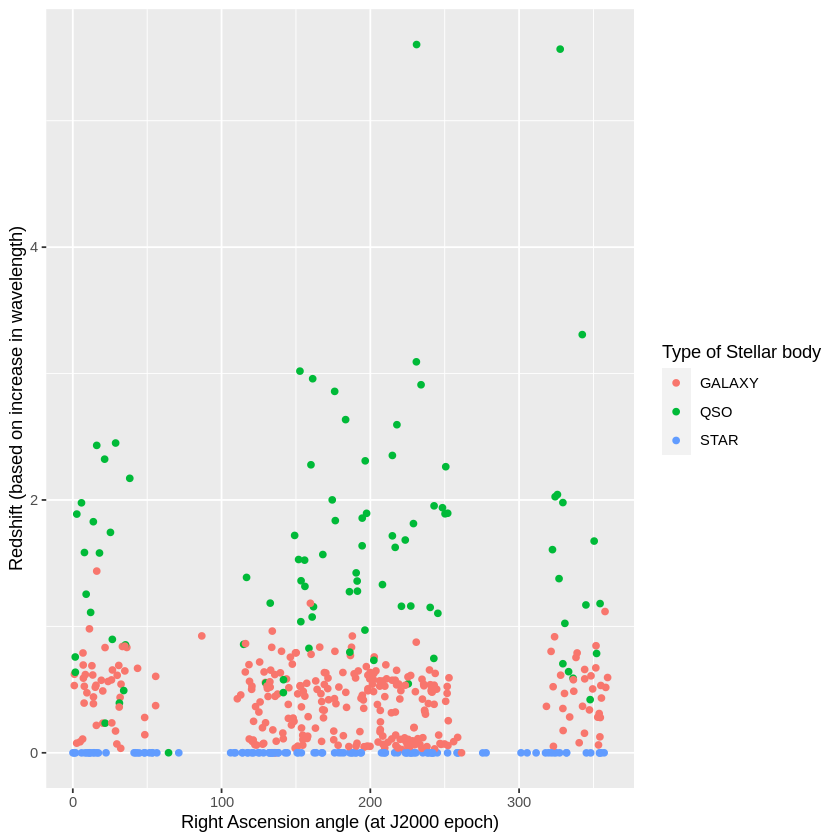

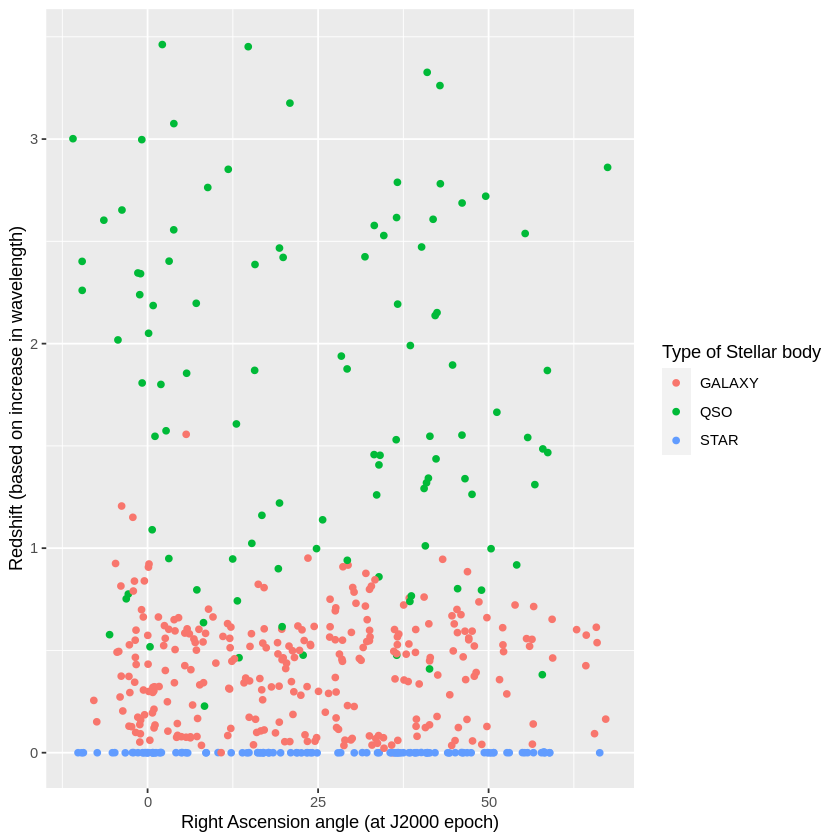

In [50]:
#Split Train and Testing data
star_split <- initial_split(star_data_tidy, prop = 0.75, strata = class)
star_training <- training(star_split)
star_testing <- testing(star_split)

star_table <- star_training |>
              group_by(class) |>
              summarize(mean_ascension_angle = mean(ascension_angle), mean_declination_angle = mean(declination_angle),
                        mean_ultraviolet_filter = mean(ultraviolet_filter), mean_green_filter = mean(green_filter),
                        mean_red_filter = mean(red_filter), mean_near_infrared_filter = mean(near_infrared_filter), mean_infrared_filter = mean(infrared_filter),
                        mean_infrared_filter = mean(infrared_filter), mean_redshift = mean(redshift), number_of_stellar_type = n())
star_table



(redshit_vs_ascension <- ggplot(star_training |> sample_n(500), aes(y = redshift, x = ascension_angle, color = class)) +
                              geom_point() +
                              labs(y = "Redshift (based on increase in wavelength)", x = "Right Ascension angle (at J2000 epoch)", color = "Type of Stellar body"))
(redshit_vs_declination <- ggplot(star_training |> sample_n(500), aes(y = redshift, x = declination_angle, color = class)) +
                              geom_point() +
                              labs(y = "Redshift (based on increase in wavelength)", x = "Right Ascension angle (at J2000 epoch)", color = "Type of Stellar body"))


Methods:

We will use xyz column to analyze our data. In particular, we will perform a classification to predict a category for a new observation using past observations of known class. In particular, we will predict xyz based on past observations of described class of xyz. 

Expected outcomes and significance:

What do you expect to find?
What impact could such findings have?
What future questions could this lead to?